<p style = "font-size : 50px; color : #532e1c ; font-family : 'Calibri'; text-align : center; background-color : #D3D3D3; border-radius: 5px 5px;"><strong>Deteccion de fraude en seguros de vehiculos</strong></p>

# Machine learning aplicado al fraude en seguros de vehiculos - TFM 
## Jhon Harry Loaiza

### Summary

El conjunto de datos objeto de análisis se llama  [*insurance_claims.csv*](https://www.kaggle.com/toramky/automobile-dataset), el cual se ha obtenido en Kaggle y está conformado por 40 columnas y 1000 filas, la descripcion de los campos del dataset es la siguiente:

La descripción de las variables del dataset es la siguiente:

* **months_as_customer**: tiempo en meses que el cliente ha estado como cliente de seguros de vehículos
* **age**: edad del cliente
* **policy_number**: numero de poliza de seguros de vehiculos
* **policy_bind_date**: fecha de inicio de la poliza de seguros de vehiculos
* **policy_state**: estado de la poliza de seguros de vehiculos
* **policy_csl**: clasificacion de la poliza de seguros de vehiculos
* **policy_deductable**: deducible de la poliza de seguros de vehiculos
* **policy_annual_premium**: cuota anual de la poliza de seguros de vehiculos
* **umbrella_limit**: limite de la poliza de seguros de vehiculos
* **insured_zip**: codigo postal del cliente
* **insured_sex**: genero del cliente de la poliza de seguros
* **insured_education_level**: nivel educativo del cliente asegurado
* **insured_occupation**: ocupacion del asegurado
* **insured_hobbies**: hobbies del cliente de la poliza de seguros de vehiculos
* **insured_relationship**: relacion del cliente de la poliza de seguros de vehiculos
* **capital-gains**: capital ganado del cliente de la poliza de seguros de vehiculos
* **capital-loss**: capital perdido del cliente de la poliza de seguros de vehiculos
* **incident_date**: fecha de incidente del cliente de la poliza de seguros de vehiculos
* **incident_type**: tipo de incidente del cliente de la poliza de seguros de vehiculos
* **collision_type**: tipo de colision del cliente de la poliza de seguros de vehiculos
* **incident_severity**: gravedad del incidente del cliente de la poliza de seguros de vehiculos
* **incident_state**: estado del incidente del cliente de la poliza de seguros de vehiculos 
* **incident_city**: ciudad del incidente del cliente de la poliza de seguros de vehiculos
* **incident_location**: localizacion del incidente del cliente de la poliza de seguros de vehiculos
* **incident_hour_of_the_day**: hora del dia del incidente del cliente de la poliza de seguros de vehiculos
* **number_of_vehicles_involved**:  numero de vehiculos involucrados en el incidente del cliente de la poliza de seguros de vehiculos
* **property_damage**: daño a la propiedad del cliente de la poliza de seguros de vehiculos
* **bodily_injuries**: heridos del cliente de la poliza de seguros de vehiculos
* **witnesses**: testigos del cliente de la poliza de seguros de vehiculos
* **police_report_available**: reporte de la policia del cliente de la poliza de seguros de vehiculos
* **total_claim_amount**: total de la reclamacion del cliente de la poliza de seguros de vehiculos
* **injury_claim**: reclamacion de heridos del cliente de la poliza de seguros de vehiculos
* **property_claim**: reclamacion de la propiedad del cliente de la poliza de seguros de vehiculos
* **vehicle_claim**: reclamacion del vehiculo del cliente de la poliza de seguros de vehiculos
* **auto_make**: marca del vehiculo del cliente de la poliza de seguros de vehiculos
* **auto_model**: modelo del vehiculo del cliente de la poliza de seguros de vehiculos
* **auto_year**: año del vehiculo del cliente de la poliza de seguros de vehiculos
* **fraud_reported**: reporte de fraude del cliente de la poliza de seguros de vehiculos

## 0. Cargue de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from collections import Counter
from boruta import BorutaPy
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
%matplotlib inline

## 1. Cargue de la base de datos y descripcion del dataset

In [2]:
# cargue de datos
df = pd.read_csv('insurance_claims.csv')
# Dimensión de los datos
print("Dimensiones del dataset:" + str(df.shape))
df.info()

Dimensiones del dataset:(1000, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null

In [3]:
for column in df:
    print(column)
    print(sorted(df[column].unique()), '\n')

months_as_customer
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 231,

In [4]:
np.min(df['auto_year'])

1995

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## 2. Preparacion de datos

Reemplazamos los valores con '?' observados en las variables categoricas como **police_report_available**. Crearemos una funcion que permite identificar los campos que posean datos perdidos. Tambien existe una columna vacia de nombre **_c39** la cual puede ser descartada mdiante esta funcion, al hacer un drop de las columnas que posen mas de un 60% de datos perdidos.

In [6]:
def drop_missing(df):
    thresh = len(df) * 0.6
    df.dropna(axis=1, thresh=thresh, inplace=True)
    return df

In [7]:
drop_missing(df)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Identificamos los valores marcados como "?" usando una 

In [8]:
perdidos = {}
for col in list(df.columns):
    if (df[col]).dtype == object:
        quotation = np.sum(df[col] == '?')
        perdidos[col] = quotation
perdidos = pd.DataFrame.from_dict(perdidos, orient = 'index')
print(perdidos)


                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


Los campos con valores "?" son tres, los cuales son **collision_type**, **property_damage**, **police_report_availabe**. Procedemos a reemplazar los valores "?" por "nan" para luego optar por imputar o no los valores.

In [9]:
# reemplazamos los valores con "?" en el dataset
df.replace('?', np.nan, inplace = True)

Veamos la proporcion de datos perdidos en cada variable

In [10]:
prop_perdidos = df.isnull().sum() * 100 / len(df)
valores_perdidos_df = pd.DataFrame({'Variable': df.columns,
                                 '% de perdidos': prop_perdidos})

valores_perdidos_df

,Variable,% de perdidos
months_as_customer,months_as_customer,0.0
age,age,0.0
policy_number,policy_number,0.0
policy_bind_date,policy_bind_date,0.0
policy_state,policy_state,0.0
policy_csl,policy_csl,0.0
policy_deductable,policy_deductable,0.0
policy_annual_premium,policy_annual_premium,0.0
umbrella_limit,umbrella_limit,0.0
insured_zip,insured_zip,0.0


Procedemos a imputar los valores perdidos en las variables que poseen nulos, usando imputacion basada en la categoria mas frecuente.

In [11]:
#Seleccionamos los campos a imputar
fields_impute = df[["property_damage", 'police_report_available', 'collision_type']]

# guardamos los nombres de las columnas
col_names_impute = list(fields_impute.columns)

#extraemos el array con los valores de las variables escogidas
data = fields_impute.values
data.shape

#https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
#https://dzone.com/articles/imputing-missing-data-using-sklearn-simpleimputer#:~:text=You%20can%20use%20Sklearn.,and%20constant%20can%20be%20used.

(1000, 3)

In [12]:
print(fields_impute['police_report_available'].value_counts())
print(fields_impute['collision_type'].value_counts())
print(fields_impute['property_damage'].value_counts())

NO     343
YES    314
Name: police_report_available, dtype: int64
Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
NO     338
YES    302
Name: property_damage, dtype: int64


In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data)
data_imputed = imputer.transform(data)
data_imputed.shape


(1000, 3)

In [14]:
# creamos el dataframe con los datos imputados
data_imputed_df = pd.DataFrame(data_imputed, columns = col_names_impute)
data_imputed_df.head()

,property_damage,police_report_available,collision_type
0,YES,YES,Side Collision
1,NO,NO,Rear Collision
2,NO,NO,Rear Collision
3,NO,NO,Front Collision
4,NO,NO,Rear Collision


In [15]:
# concatenamos los datos originales con los imputados
df.drop(['property_damage', 'police_report_available', 'collision_type'], axis = 1, inplace = True)
df = pd.concat([df, data_imputed_df], axis = 1)

#Verficamos que los datos se han imputado correctamente
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
injury_claim                   0
property_c

In [16]:
print(df['police_report_available'].value_counts())
print(df['collision_type'].value_counts())
print(df['property_damage'].value_counts())

NO     686
YES    314
Name: police_report_available, dtype: int64
Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
NO     698
YES    302
Name: property_damage, dtype: int64


In [17]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,property_damage,police_report_available,collision_type
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,1,2,71610,6510,13020,52080,Saab,92x,2004,Y,YES,YES,Side Collision
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,0,0,5070,780,780,3510,Mercedes,E400,2007,Y,NO,NO,Rear Collision
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N,NO,NO,Rear Collision
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NO,NO,Front Collision
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,0,1,6500,1300,650,4550,Accura,RSX,2009,N,NO,NO,Rear Collision


Hemos imputado los valores faltantes de manera satisfactoria.

## 3. Outliers en la data 

Seleccionamos los campos de tipo numerico y categorico y los guardamos en una variable llamada **data_outliers**

In [18]:
numeric_df = df.select_dtypes(include = ["number"])

In [19]:
#Hacemos un drop de la columna "policy_number" ya que es una columna index.
numeric_df.drop(['policy_number'], axis=1, inplace=True)

Usar clases para construir modelos
https://towardsdatascience.com/using-classes-for-machine-learning-2ed6c0713305

Veamos la distribucion de los datos en cada variable numerica 

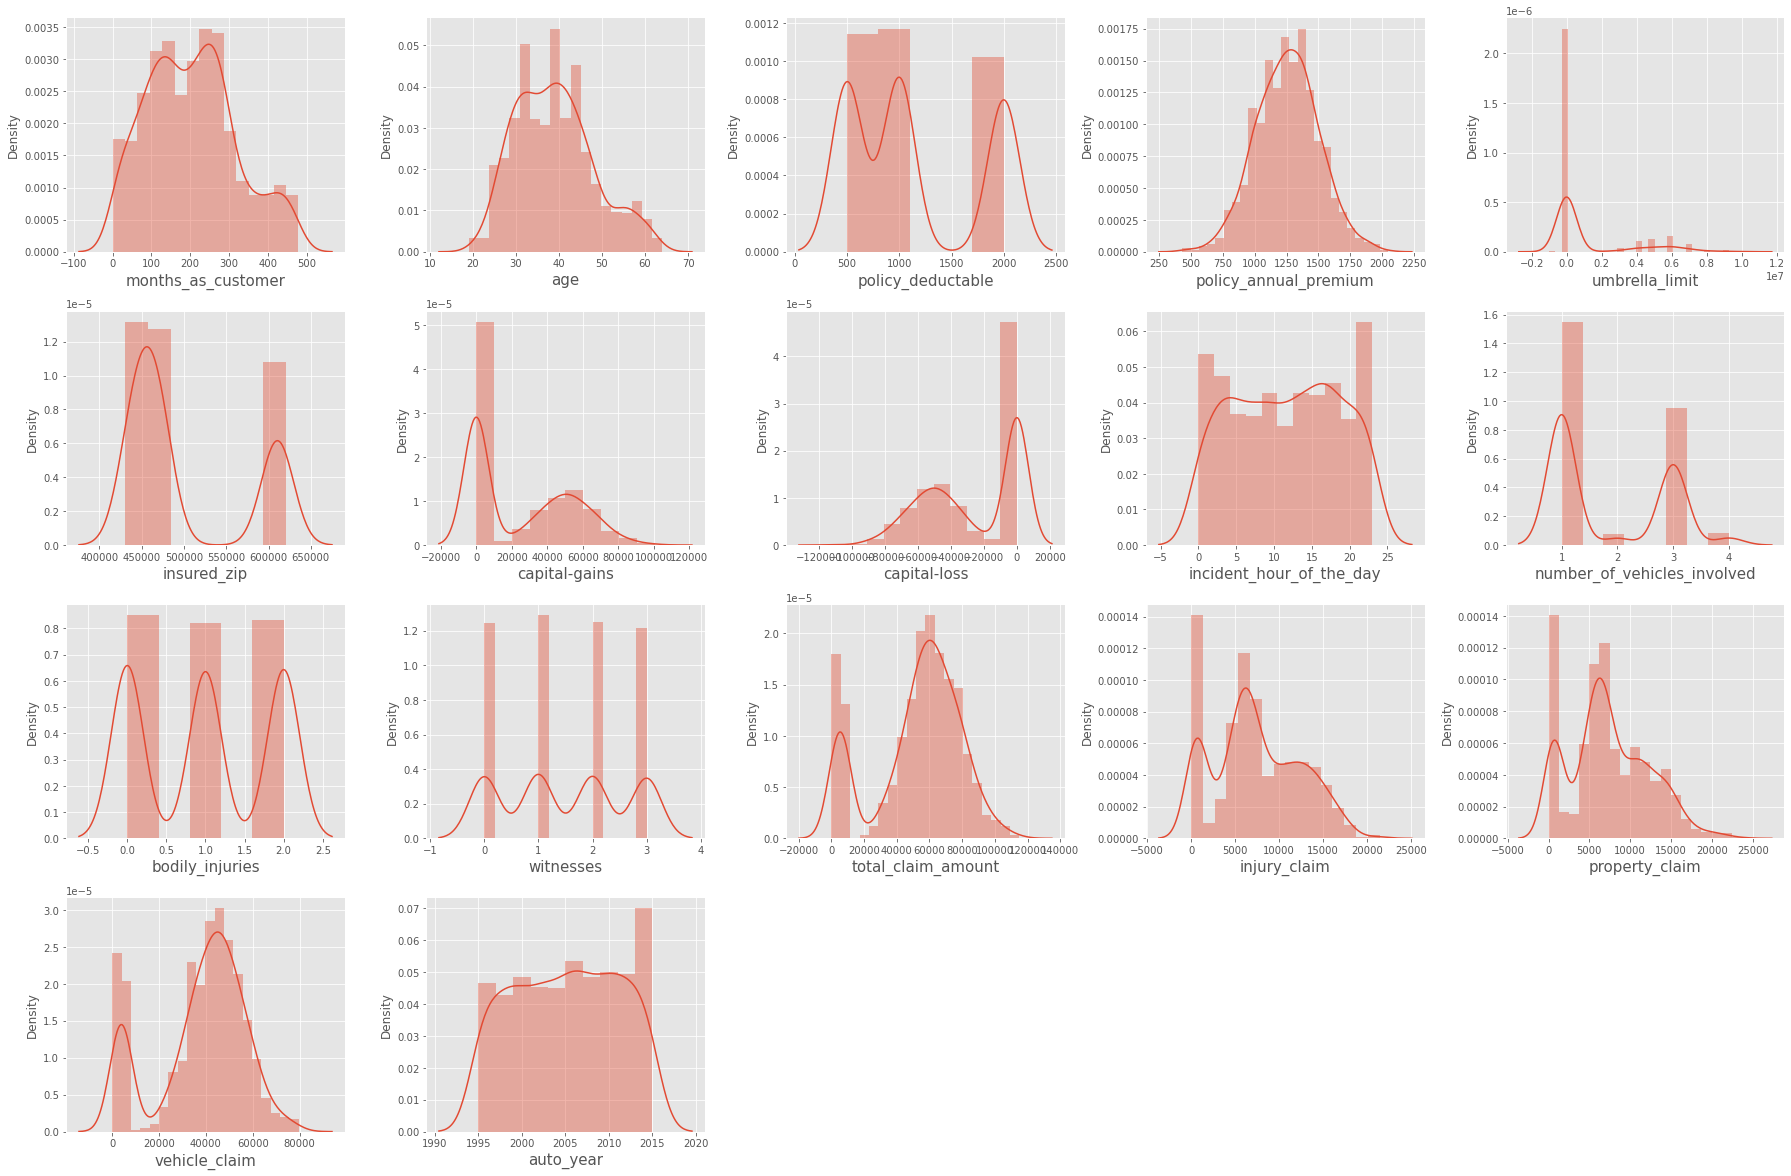

In [20]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in numeric_df.columns:
    if plotnumber <= 28:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(numeric_df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Veamos ahora los outliers en los campos numericos   

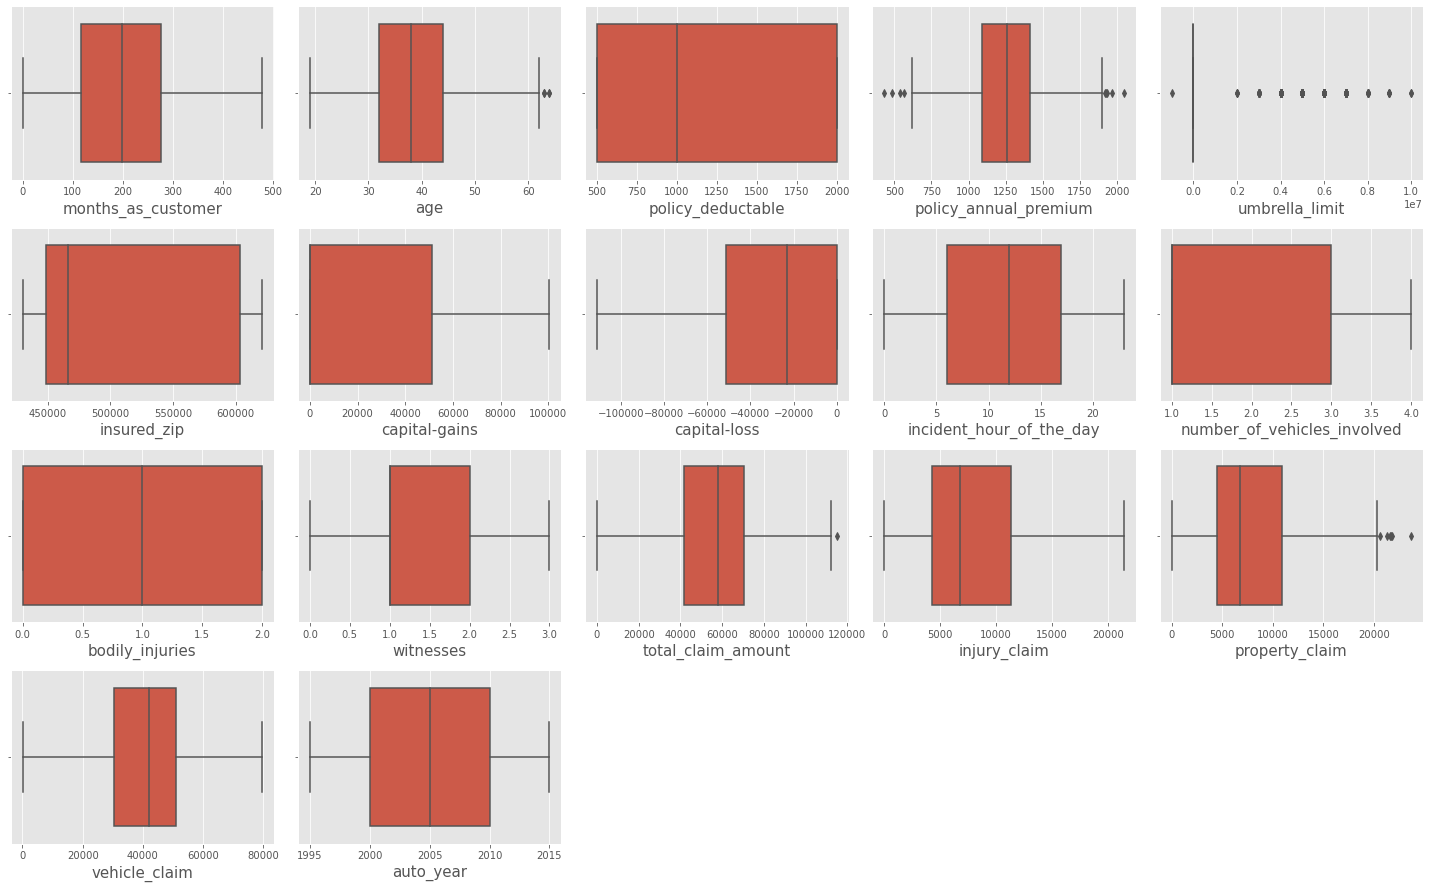

In [21]:
plt.figure(figsize = (20, 15))
plot_box = 1

for col in numeric_df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plot_box)
        sns.boxplot(numeric_df[col])
        plt.xlabel(col, fontsize = 15)
    
    plot_box += 1
plt.tight_layout()
plt.show()

Los outliers parece que son datos que pueden ser reales en el contexto de los casos, podriamos ver la distribucion de los casos por la variable objetivo para tener mejor idea de lo que pasa. Podemos hacer un escalamiento de las variables numricas luego, antes de realizar la modelacion.

## 4. Visualizacion datos


### 4.1 Analisis Exploratorio de datos

In [22]:
Baseline=pd.DataFrame({'Count':df.groupby(['fraud_reported']).size()})
Baseline=Baseline.reset_index()
Baseline['Prop']=Baseline['Count']/Baseline['Count'].sum()

In [23]:
Baseline

,fraud_reported,Count,Prop
0,N,753,0.753
1,Y,247,0.247


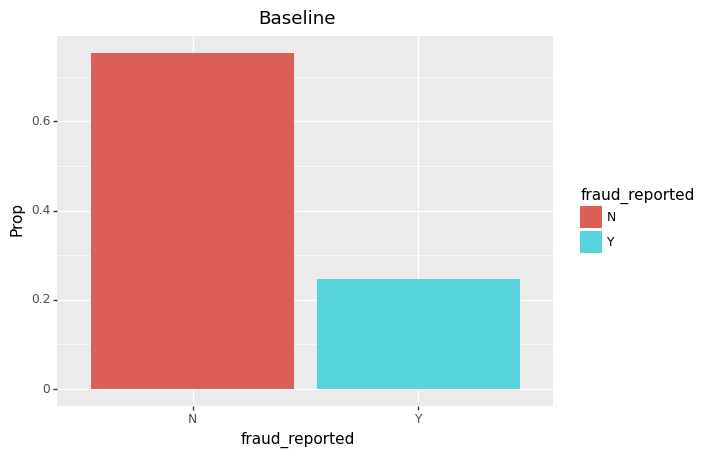

<ggplot: (156160191498)>

In [24]:
(ggplot(Baseline, aes(x='fraud_reported',y='Prop',fill='fraud_reported'))+geom_col()+ggtitle('Baseline'))

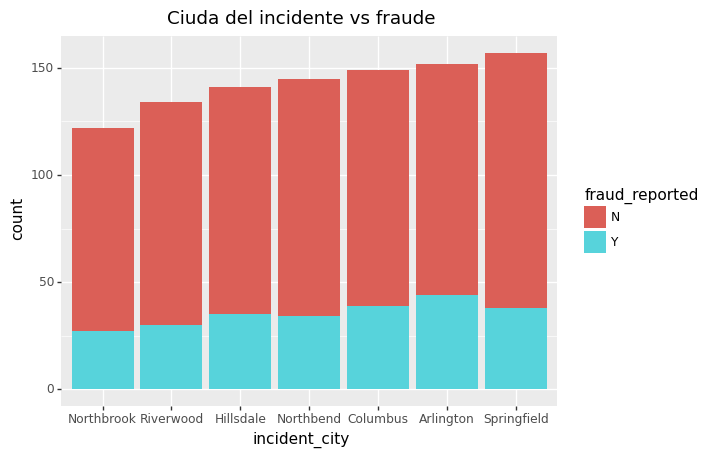

<ggplot: (156160292605)>

In [25]:
city = df['incident_city'].value_counts().index.to_list()[::-1]

ggplot(df) + geom_bar(aes(x='incident_city', fill='fraud_reported'))+\
scale_x_discrete(limits=city)+\
    ggtitle('Ciuda del incidente vs fraude')

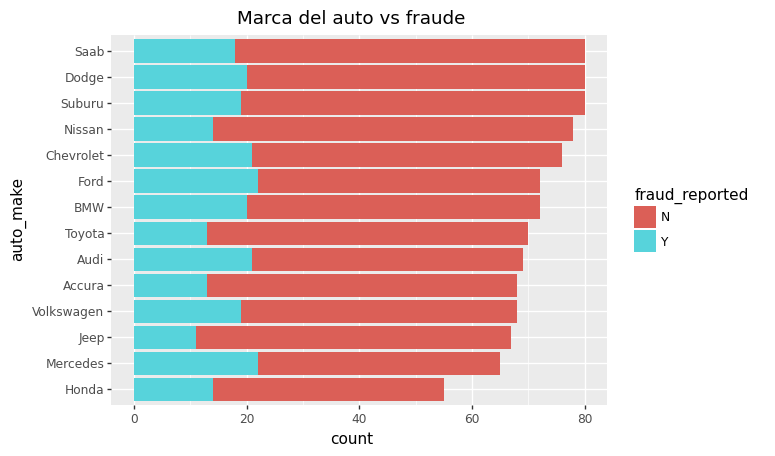

<ggplot: (156160191492)>

In [26]:
# creamos la lista ordenada de las marcas
make = df.auto_make.value_counts().index.to_list()[::-1]

ggplot(df) + geom_bar(aes(x='auto_make', fill='fraud_reported'))+\
coord_flip() + scale_x_discrete(limits=make)+\
     ggtitle('Marca del auto vs fraude')

Se observa una mayor cantidad de autos de la marca Mercedes Benz envueltos en reclamaciones fraudulentas. Los Nissan parecen tener la menor propocion de casos fraudulentos dentro de su grupo.

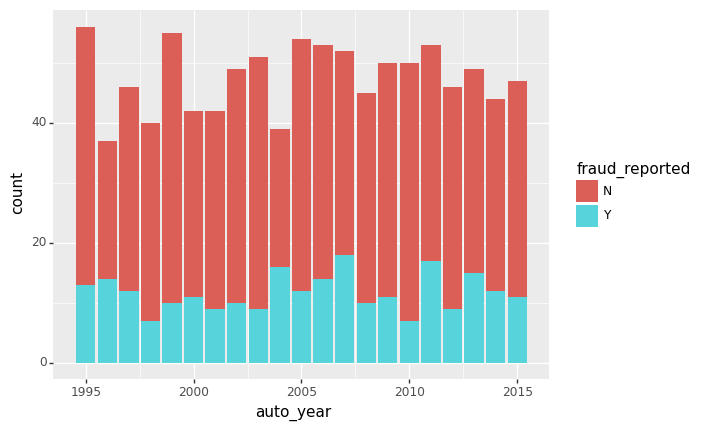

<ggplot: (156160295991)>

In [27]:
ggplot(df) + geom_bar(aes(x='auto_year', fill='fraud_reported'))

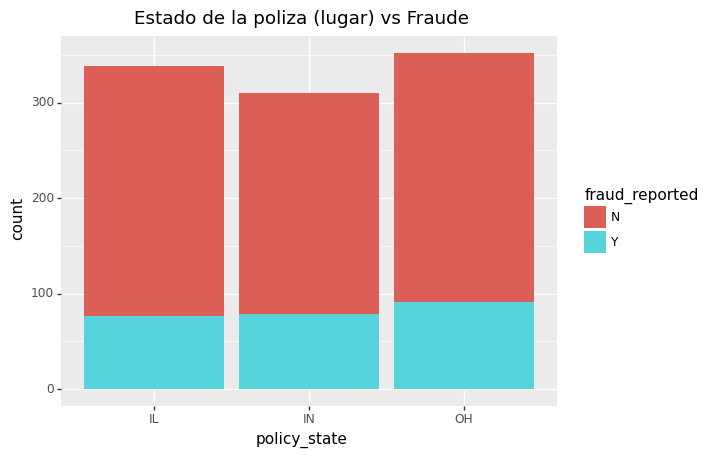

<ggplot: (156160292395)>

In [28]:
ggplot(df) + geom_bar(aes(x='policy_state', fill='fraud_reported'))+ggtitle('Estado de la poliza (lugar) vs Fraude')

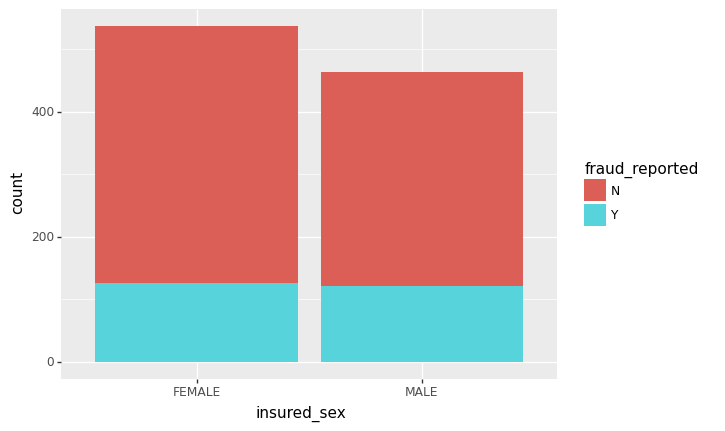

<ggplot: (156160290413)>

In [29]:
ggplot(df) + geom_bar(aes(x='insured_sex', fill='fraud_reported'))

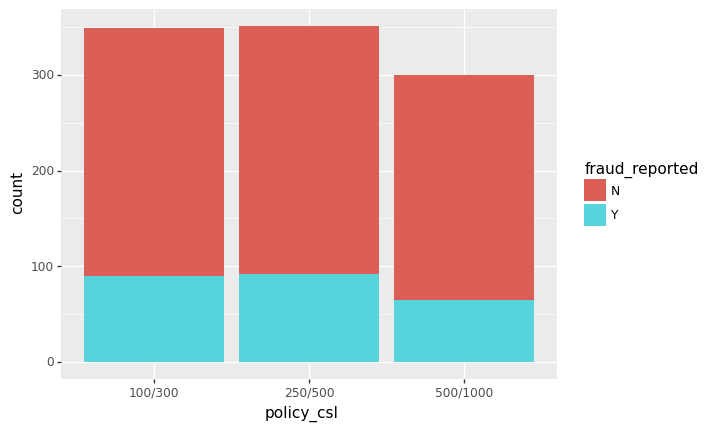

<ggplot: (156159329991)>

In [30]:
ggplot(df) + geom_bar(aes(x='policy_csl', fill='fraud_reported'))

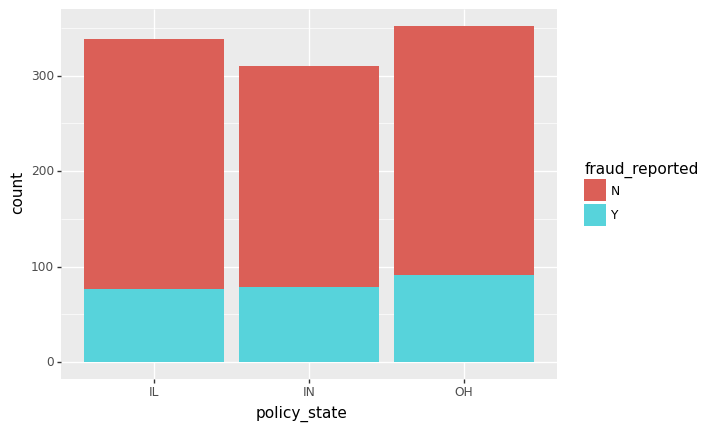

<ggplot: (156159721975)>

In [31]:
ggplot(df) + geom_bar(aes(x='policy_state', fill='fraud_reported'))

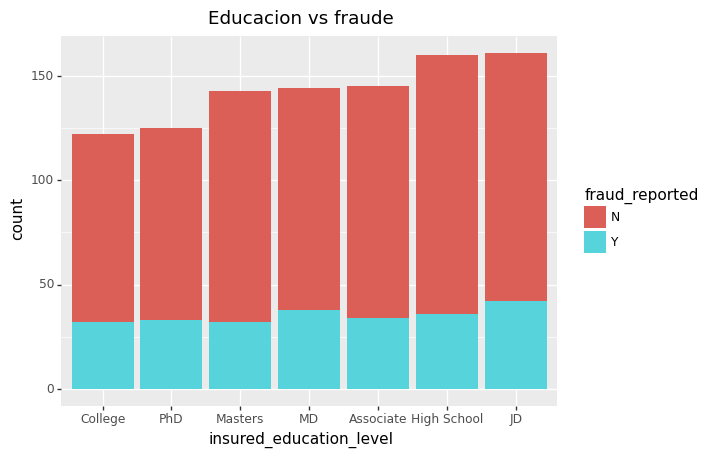

<ggplot: (156159760150)>

In [32]:
education = df['insured_education_level'].value_counts().index.to_list()[::-1]
ggplot(df) + geom_bar(aes(x='insured_education_level', fill='fraud_reported')) +\
     scale_x_discrete(limits=education)+\
     ggtitle('Educacion vs fraude')

Las personas de menor nivel educativo son mas propensas a realizar fraude en las reclamaciones. por el contrario, a mayor nivel educativo, menor es la probabilidad de realizar fraude.

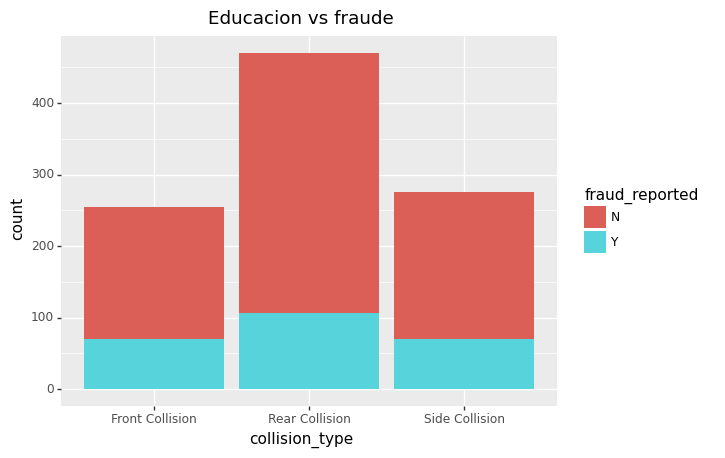

<ggplot: (156159458916)>

In [33]:
ggplot(df) + geom_bar(aes(x='collision_type', fill='fraud_reported')) +\
          ggtitle('Educacion vs fraude')

### 4.2 Correlacion de los datos

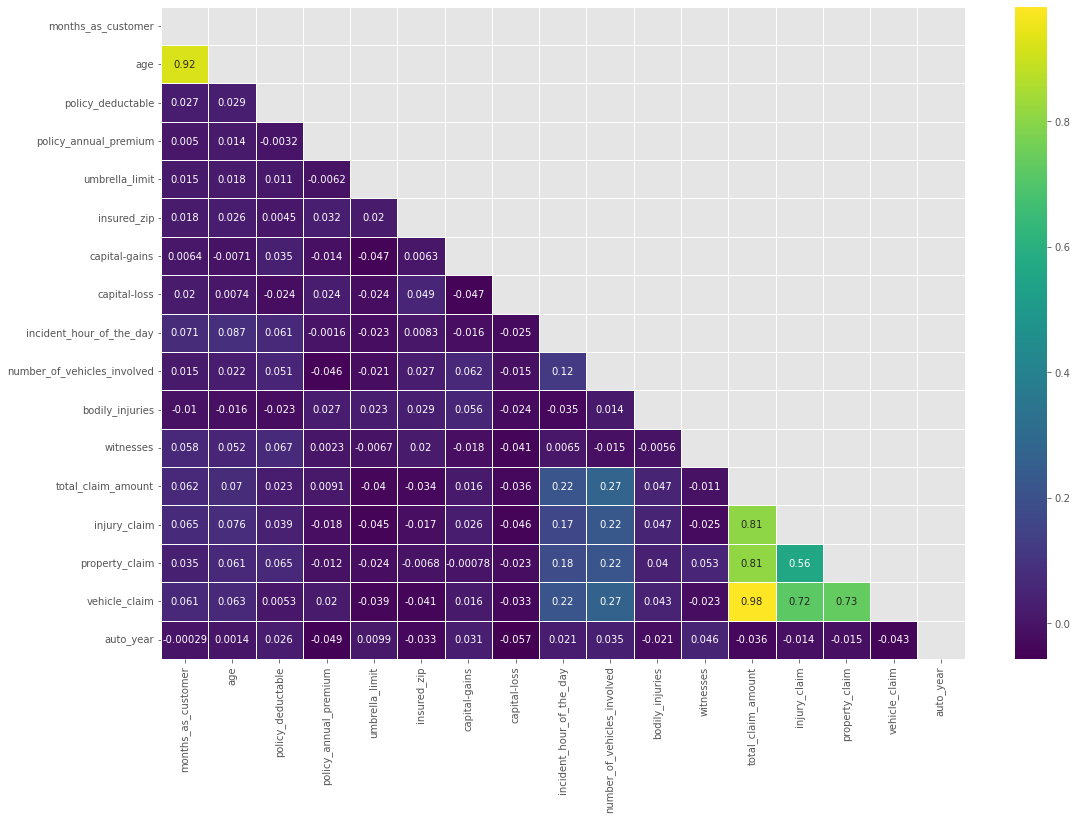

In [34]:
plt.figure(figsize = (18, 12))

corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, cmap="viridis", mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

Se puede descartar las variables que tengan poca correlacion con la variable y estas variables pueden ser eliminadas de la data.
Notese que el comportamiento de las variables categoricas es diferente.

Por ejemplo **age** del cliente se correlaciona fuertemente con la variable **months_as_customer**, podemos descartar age. sucede lo mismo con las variables **total_claim_amount**, que se relaciona fuertemente con las variables **injury_claim**, **property_claim** y **vehicle_claim** asi que esta primera podria descartarse en la data.

In [35]:
# create a function to detect variables with correlation superior to 0.8
def correl_drop(df, umbral):
    correlation = df.corr().abs()
    upper_matrix = correlation.where(np.triu(np.ones(correlation.shape), k = 1).astype(np.bool))
    drop_cols = [column for column in upper_matrix.columns if any(upper_matrix[column] > umbral)]
    return drop_cols

correl_drop(numeric_df, 0.5)

['age', 'injury_claim', 'property_claim', 'vehicle_claim']

En este caso, descartaremos las variables **Age** y **Total Claim Amount**, pero esto lo haremos mas adelante.

Veamos algunos graficos para evidenciar el comportamiento de las variables vs la variable objetivo.

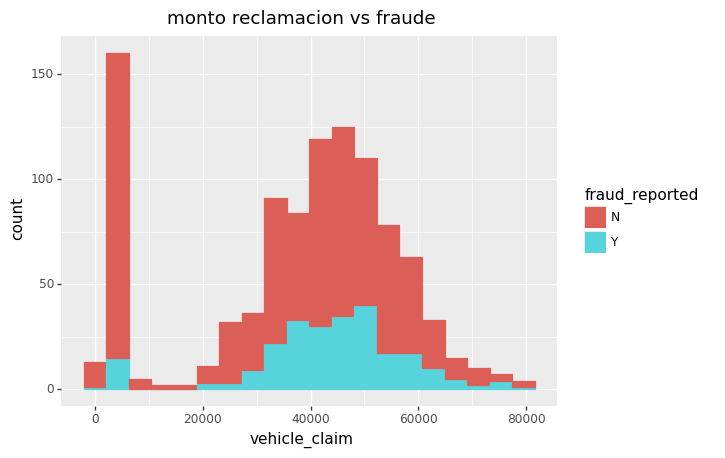

<ggplot: (156159662276)>

In [36]:
ggplot(aes(x=df.vehicle_claim,color=df.fraud_reported,fill = df.fraud_reported))+geom_histogram()+ggtitle('monto reclamacion vs fraude')


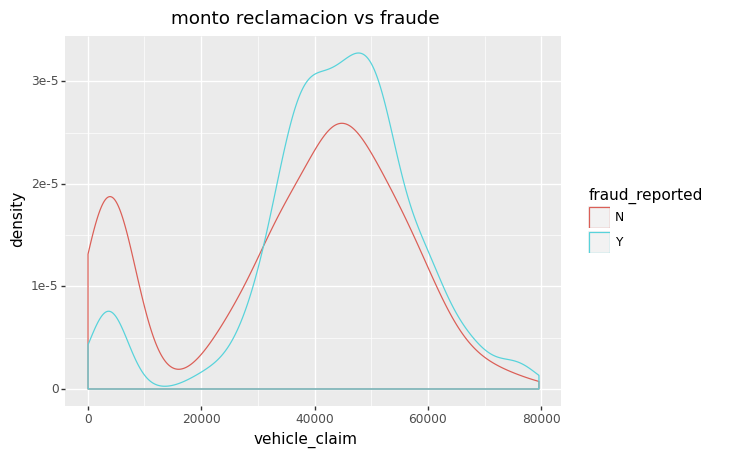

<ggplot: (156159749114)>

In [37]:
ggplot(aes(x=df.vehicle_claim,color=df.fraud_reported))+geom_density()+ggtitle('monto reclamacion vs fraude')

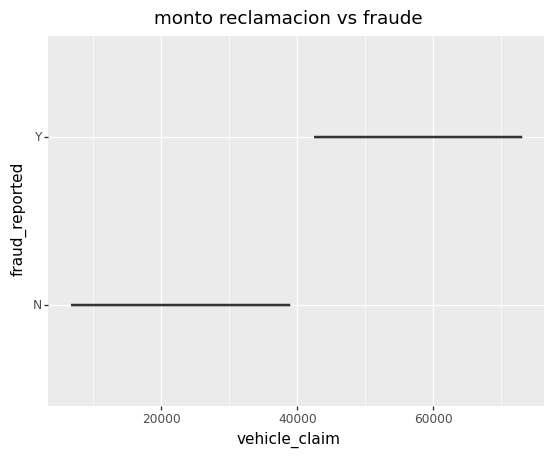

<ggplot: (156159661186)>

In [38]:
ggplot(aes(x=df.vehicle_claim,y=df.fraud_reported))+geom_boxplot()+ggtitle('monto reclamacion vs fraude')

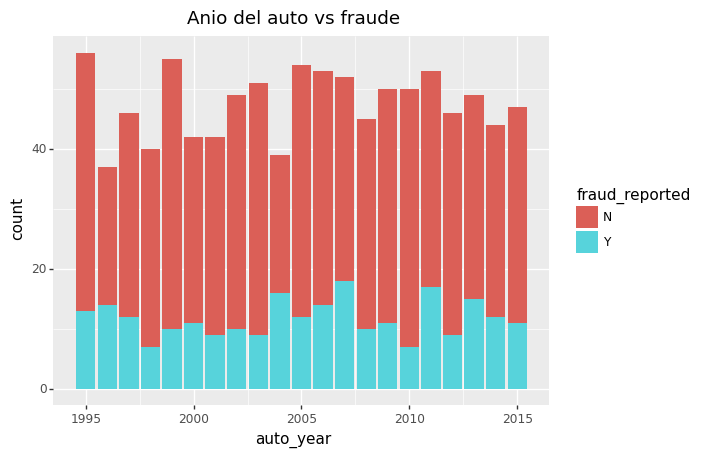

<ggplot: (156159528376)>

In [39]:
ggplot(df) + geom_bar(aes(x='auto_year', fill='fraud_reported'))+ggtitle('Anio del auto vs fraude')

In [40]:
np.min(df.policy_bind_date)
np.max(df.policy_bind_date)

'2015-02-22'

In [41]:
date_policy = pd.crosstab(df.policy_bind_date, df.fraud_reported)
date_policy.head()

fraud_reported,N,Y
policy_bind_date,,
1990-01-08,1,0
1990-01-27,0,1
1990-02-01,1,0
1990-02-03,1,0
1990-02-08,1,0


El campo **policy bind date** no muestra una relacion importante con la variable objetivo 

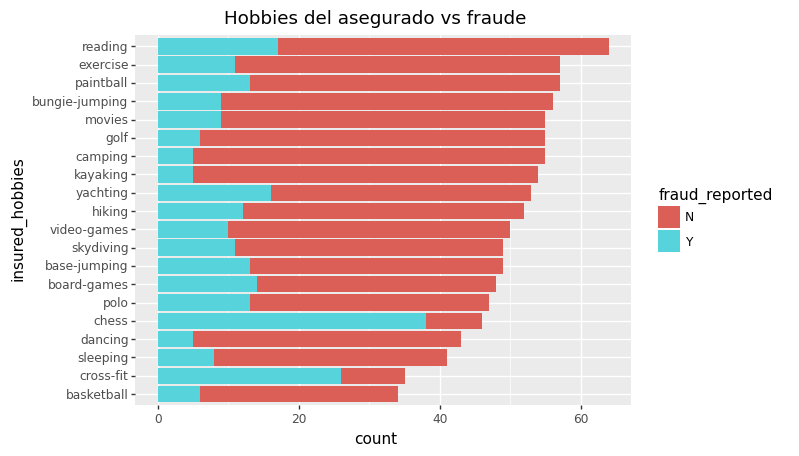

<ggplot: (156159688081)>

In [42]:
hobbies = df['insured_hobbies'].value_counts().index.tolist()[::-1]
ggplot(df) + geom_bar(aes(x='insured_hobbies', fill='fraud_reported'))+\
    coord_flip()+ scale_x_discrete(limits=hobbies)+\
    ggtitle('Hobbies del asegurado vs fraude')

Las personas que juegan *ajedrez* o realizan *crossfit* en sus **hobbies**, estan mas propensas a cometer fraude, por lo que es interesante este campo en la prediccion de los casos de fraude.

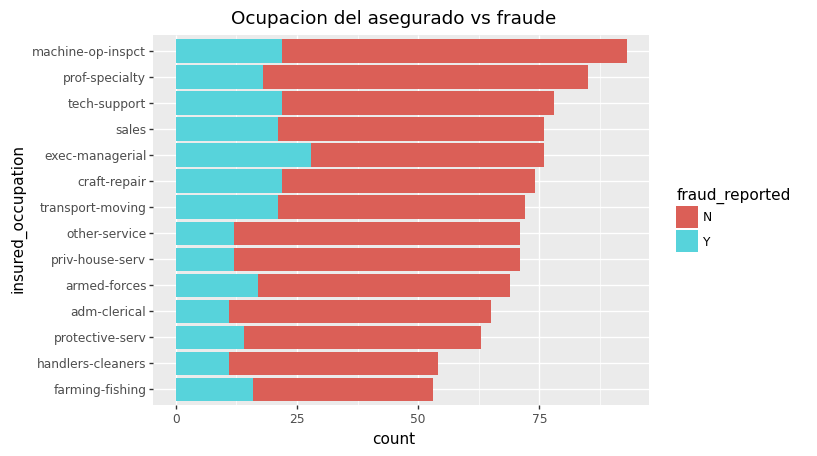

<ggplot: (156161184708)>

In [43]:
# ordeanmos los datos por la frecuencia de las categorias de ocupacion
ocupation = df['insured_occupation'].value_counts().index.tolist()[::-1]
# generamos el grafico
ggplot(df) + geom_bar(aes(x='insured_occupation', fill='fraud_reported'))+\
    coord_flip()+scale_x_discrete(limits=ocupation) +\
        ggtitle('Ocupacion del asegurado vs fraude')

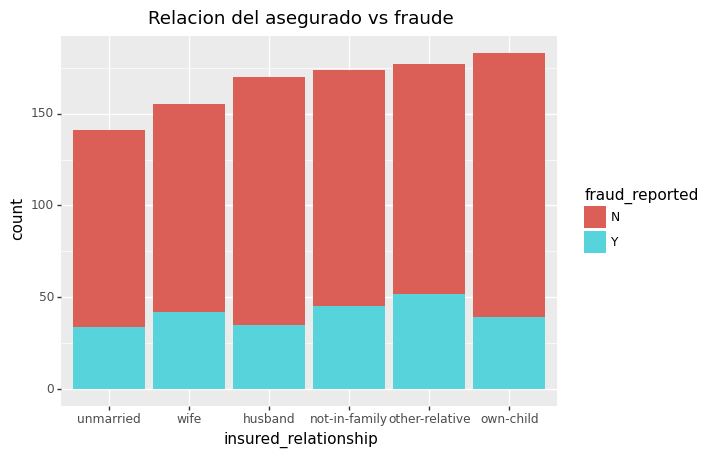

<ggplot: (156160623339)>

In [44]:
relation = df['insured_relationship'].value_counts().index.tolist()[::-1]
# generamos el grafico
ggplot(df) + geom_bar(aes(x='insured_relationship', fill='fraud_reported'))+\
    scale_x_discrete(limits=relation) +\
        ggtitle('Relacion del asegurado vs fraude')

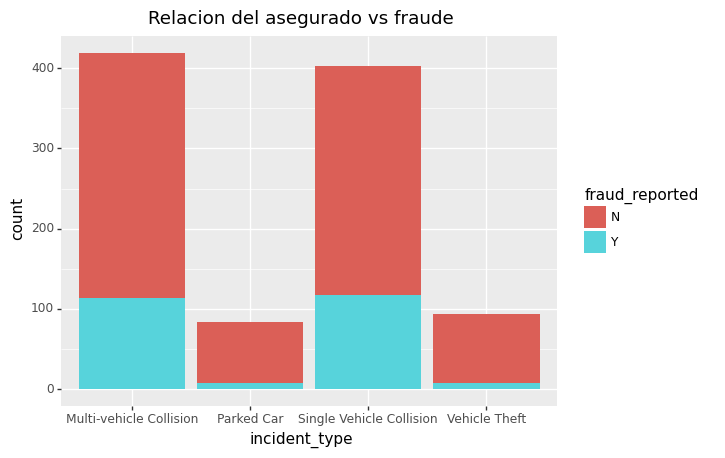

<ggplot: (156161179989)>

In [45]:
#relation = df['insured_relationship'].value_counts().index.tolist()[::-1]
# generamos el grafico
ggplot(df) + geom_bar(aes(x='incident_type', fill='fraud_reported'))+\
           ggtitle('Relacion del asegurado vs fraude')

## 4. Preprocesamiento de datos

### 4.1 Creacion de nuevas features

Empezaremos con crear un campo que indica la cantidad de anios que el vehiculo posee, usando la columna del anio en que se manufacturo el vehiculo **(auto_year)** esto nos servira para identificar si la antiguedad del modelo del vehiculo posee alguna relacion con el fraude o no.

In [46]:
anio_actual = pd.datetime.now().year # obtenemos el anio actual
df['age_vehicle'] = anio_actual - df['auto_year'] # calculamos la edad del vehiculo

df['age_vehicle'].head(10)

0    18
1    15
2    15
3     8
4    13
5    19
6    10
7     7
8    10
9    26
Name: age_vehicle, dtype: int64

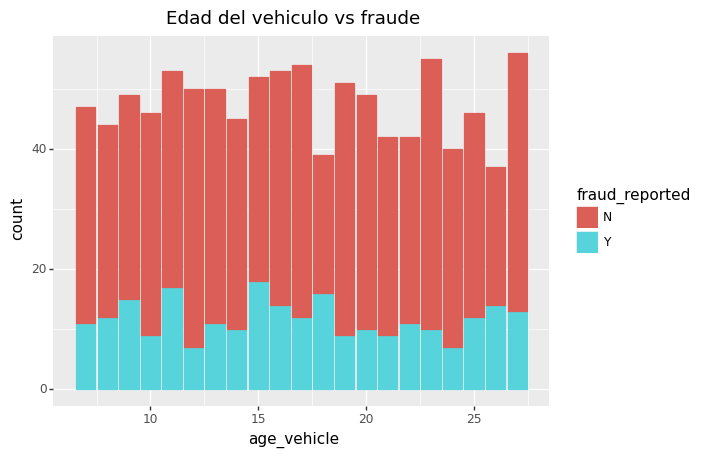

<ggplot: (156160655132)>

In [47]:
ggplot(aes(x=df.age_vehicle,color=df.fraud_reported, fill = df.fraud_reported))+geom_bar()+ggtitle('Edad del vehiculo vs fraude')

Veamos las proporciones para cada anio del vehiculo

In [48]:
def highlight(val):
  return ['background-color: red' if a>0.7 else '' for a in val] 

# Crosstab por anio del vehiculo
ct=pd.crosstab(df.age_vehicle,df.fraud_reported,normalize="index").transpose()
ct.style.apply(highlight)

age_vehicle,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
fraud_reported,,,,,,,,,,,,,,,,,,,,,
N,0.765957,0.727273,0.693878,0.804348,0.679245,0.860000,0.780000,0.777778,0.653846,0.735849,0.777778,0.589744,0.823529,0.795918,0.785714,0.738095,0.818182,0.825000,0.739130,0.621622,0.767857
Y,0.234043,0.272727,0.306122,0.195652,0.320755,0.140000,0.220000,0.222222,0.346154,0.264151,0.222222,0.410256,0.176471,0.204082,0.214286,0.261905,0.181818,0.175000,0.260870,0.378378,0.232143


Ahora vamos a hacer un split en el campo de policy_csl, ya que en la teoria este es el monto de cobertura d ela poliza por danos a persona y danos a vehiculo respectivamente.

In [49]:
df['csl_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_accident'] = df.policy_csl.str.split('/', expand=True)[1]
df[['policy_csl', 'csl_person', 'csl_accident']].head()

,policy_csl,csl_person,csl_accident
0,250/500,250,500
1,250/500,250,500
2,100/300,100,300
3,250/500,250,500
4,500/1000,500,1000


Ahora convertimos el campo de hora de ocurrencia del accidente y lo categorizamos dependiendo la hora del dia. podemos dividir el dia de 24 hrs en intervalos de 3 horas, dando como resutado 8 grupos de horas.

In [50]:
# Creamos los intervalos en grupos de 3 hrs
intervalos = [-1, 3, 6, 9, 12, 16, 20, 24]  
# asignamos los nombres a los intervalos de tiempo
cat = ["medianoche", "manana_temprano", "manana", 'mediodia', 'tarde', 'noche_temprano', 'noche']
df['incidente_periodo_dia'] = pd.cut(df.incident_hour_of_the_day, intervalos, labels=cat).astype(object)
df[['incident_hour_of_the_day', 'incidente_periodo_dia']].head(20)

,incident_hour_of_the_day,incidente_periodo_dia
0,5,manana_temprano
1,8,manana
2,7,manana
3,5,manana_temprano
4,20,noche_temprano
5,19,noche_temprano
6,0,medianoche
7,23,noche
8,21,noche
9,14,tarde


Veamos graficamente como se distribuyen los casos por periodo del dia de ocurrencia del accidente. Parece haber maor cantidad de casos en la tarde fraudulentos mientras que en la manana son menos frecuentes.

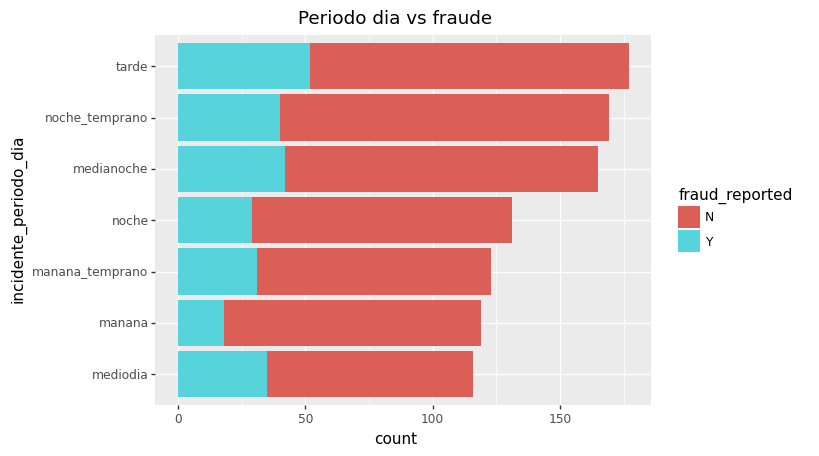

<ggplot: (156160655336)>

In [51]:
incidente_hora = df.incidente_periodo_dia.value_counts().index.tolist()[::-1]

# generamos el grafico
ggplot(df) + geom_bar(aes(x='incidente_periodo_dia', fill='fraud_reported'))+\
    coord_flip()+scale_x_discrete(limits=incidente_hora) +\
        ggtitle('Periodo dia vs fraude')

In [52]:
# Crosstab por incidente_periodo_dia del vehiculo
ct1=pd.crosstab(df.incidente_periodo_dia,df.fraud_reported,normalize="index").transpose()
ct1.style.apply(highlight)

incidente_periodo_dia,manana,manana_temprano,medianoche,mediodia,noche,noche_temprano,tarde
fraud_reported,,,,,,,
N,0.848739,0.747967,0.745455,0.698276,0.778626,0.763314,0.706215
Y,0.151261,0.252033,0.254545,0.301724,0.221374,0.236686,0.293785


El campo **umbrella_limit** posee un valor negativo que no es correcto segun el contexto de la variable, se reemplaza por un valor 0.

In [53]:
df['umbrella_limit']=df['umbrella_limit'].replace(-1000000,0)

Hacemos un drop de las columnas que no se utilizaran mas en la data. Se incluyen las columnas con alta correlacion como age, total_claim_amount, ademas de las columnas de fechas y de localizacion de incidente ya qe tienen muchas categorias que no se pueden agrupar con facilidad.

In [54]:
# Drop de columnas:

df = df.drop(columns = [
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    'auto_year', 
    'policy_number',
    'total_claim_amount',
    'age',
    'incident_hour_of_the_day'])

In [55]:
df.head()

,months_as_customer,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,property_damage,police_report_available,collision_type,age_vehicle,csl_person,csl_accident,incidente_periodo_dia
0,328,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Major Damage,Police,SC,Columbus,1,1,2,6510,13020,52080,Saab,92x,Y,YES,YES,Side Collision,18,250,500,manana_temprano
1,228,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Minor Damage,Police,VA,Riverwood,1,0,0,780,780,3510,Mercedes,E400,Y,NO,NO,Rear Collision,15,250,500,manana
2,134,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Minor Damage,Police,NY,Columbus,3,2,3,7700,3850,23100,Dodge,RAM,N,NO,NO,Rear Collision,15,100,300,manana
3,256,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Major Damage,Police,OH,Arlington,1,1,2,6340,6340,50720,Chevrolet,Tahoe,Y,NO,NO,Front Collision,8,250,500,manana_temprano
4,228,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Minor Damage,None,NY,Arlington,1,0,1,1300,650,4550,Accura,RSX,N,NO,NO,Rear Collision,13,500,1000,noche_temprano


## 5. Creacion datasets de train y test

Realizamos un split de los datos, las variables independientes y las variables dependientes, ademas convertimos la variable dependiente **fraud_reported** en binaria

In [56]:
# variables independientes:
X = df.drop(['fraud_reported'], axis=1)
# variable dependiente y binarizamos
y = np.where(df['fraud_reported'] == 'Y', 1, 0)

### 5.2 One-Hot Encoding en las variables categoricas

Creamos el dataset de variables categoricas y lo guardamos en una variable llamada **categorical_df**, para luego aplicarle la funcion **get_dummies**

In [57]:
categorical_df = X.select_dtypes(include = ["object"])

# creamos las variables dummy
categorical_df_dummy = pd.get_dummies(categorical_df, drop_first=True)

In [58]:
categorical_df_dummy.head()

,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,property_damage_YES,police_report_available_YES,collision_type_Rear Collision,collision_type_Side Collision,csl_person_250,csl_person_500,csl_accident_300,csl_accident_500,incidente_periodo_dia_manana_temprano,incidente_periodo_dia_medianoche,incidente_periodo_dia_mediodia,incidente_periodo_dia_noche,incidente_periodo_dia_noche_temprano,incidente_periodo_dia_tarde
0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0

Agrupamos las variables para crear nuevamente el dataset completo

In [59]:
X1 = categorical_df_dummy.join(X.select_dtypes(include = ['number']))
names_cols = X1.columns.tolist() # Guardamos los nombres de las columnas para luego aplicar algoritmo boruta
X1.head()
print(X1.shape)

(1000, 146)


https://www.youtube.com/watch?v=uFDdzTjn190 rainplots

https://towardsdatascience.com/simple-example-using-boruta-feature-selection-in-python-8b96925d5d7a
https://towardsdatascience.com/cleaner-data-analysis-with-pandas-using-pipes-4d73770fbf3c
https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b

In [60]:
# TEST  Boruta algorithm
# fit the random forest model

#forest = RandomForestClassifier(n_estimators=100, random_state=0)

# convert df to numpy array
X = X1.values

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X, y)



RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [61]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=1, random_state=1)

# find all relevant features
feat_selector.fit(X, y)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100


BorutaPy finished running.

Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	139


In [62]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(names_cols, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: policy_state_IN           Rank: 34,  Keep: False
Feature: policy_state_OH           Rank: 48,  Keep: False
Feature: insured_sex_MALE          Rank: 55,  Keep: False
Feature: insured_education_level_College Rank: 102,  Keep: False
Feature: insured_education_level_High School Rank: 43,  Keep: False
Feature: insured_education_level_JD Rank: 72,  Keep: False
Feature: insured_education_level_MD Rank: 58,  Keep: False
Feature: insured_education_level_Masters Rank: 64,  Keep: False
Feature: insured_education_level_PhD Rank: 68,  Keep: False
Feature: insured_occupation_armed-forces Rank: 79,  Keep: False
Feature: insured_occupation_craft-repair Rank: 37,  Keep: False
Feature: insured_occupation_exec-managerial Rank: 16,  Keep: False
Feature: insured_occupation_farming-fishing Rank: 100,  Keep: False
Feature: insured_occupation_handlers-cleaners Rank: 89,  Keep: False
Feature: insured_occupation_machine-op-inspct Rank: 45,  Keep: False
Feature: insured_occupation_other-service Rank: 46

## 5. Balanceo de datos 

La variable objetivo es la variable **fraud_reported**, la cual tiene una distribucion de valores de 1 a 0, donde 1 es fraude y 0 No hay fraude. Usaremos el algoritmo ADASYN para balancear los datos.

* https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
* https://medium.com/geekculture/insurance-claims-fraud-detection-using-machine-learning-78f04913097
* https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/4954928053318020/1058911316420443/167703932442645/latest.html
* https://towardsdatascience.com/cleaner-data-analysis-with-pandas-using-pipes-4d73770fbf3c

In [63]:
smote = SMOTE(random_state=42)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  # matriz con las variables predictivas
    y, # array con los valores de la variable objetivo
    test_size=0.2,  # proporción a dejar en el test set
    random_state=123, # para controlar la semilla aleatoria
    stratify=y) # indica la variable de estratificación estratificación de la muestra

In [65]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 753, 1: 247})


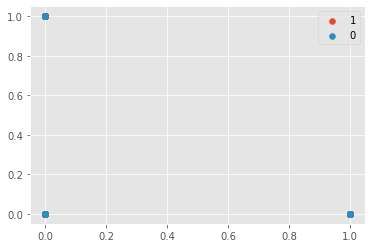

In [66]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [67]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

rus = RandomOverSampler(random_state=4,sampling_strategy=0.5)
X_train_r, y_train_r = rus.fit_resample(X_train,y_train)
###la data es devuelta en forma secuencial: una clase tras otra, por lo que debemos aleatorizarla
data_r=pd.DataFrame(np.column_stack([X_train_r,y_train_r])).sample(frac=1).values
print("Valores balanceados : ", Counter(data_r[:,-1]));

nrow,ncol=data_r.shape
X_train_r=data_r[:,0:(ncol-1)]
y_train_r=data_r[:,-1]
y_train=y_train_r

Valores balanceados :  Counter({0.0: 602, 1.0: 301})


In [68]:
print(X_train.shape)
print(y_train.shape)

print(X_train_r.shape)
print(X_test.shape)

print(y_train_r.shape)
print(y_test.shape)

(800, 146)
(903,)
(903, 146)
(200, 146)
(903,)
(200,)


# Revisar Estandarizacion de Datos:

### 5.3 Estandarizacion de las variables numericas

Como se vio el los graficos de boxplot, existen campos numericos con distintos, por lo que procedemos a estandarizar los datos numericos para que sean mas uniformes.

In [69]:
# creamos el scaler
scaler = StandardScaler()
# renombramos los datasets creados anteriomente
DataX_train=X_train_r
DataX_test=X_test

'''
def std_day(x):
  ##"INPUT AS A PD. DATAFRAME
  daily_data_Train=x[:,0:90].T
  scaled_features =StandardScaler()
  daily_dataSTD_Train=scaled_features.fit_transform(daily_data_Train).T
  CreateVars_Train=x[:,90:107]
  CreateVarSTD_Train=scaled_features.fit_transform(CreateVars_Train)
  datamod=np.hstack([daily_dataSTD_Train, CreateVarSTD_Train])
  return (datamod)
'''
DataX_train=scaler.fit_transform(DataX_train)
DataX_test=scaler.transform(DataX_test)

Performance del clasificador

In [70]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.metrics import jaccard_score, f1_score, log_loss , cohen_kappa_score
from sklearn.metrics import roc_auc_score

def metrics(real,pred):
  kappa=cohen_kappa_score(real,pred)
  acc=accuracy_score(real,pred)
  f1=f1_score(real,pred)
  prec=precision_score(real,pred)
  recall=recall_score(real,pred)
  jaccard=jaccard_score(real,pred)
  logloss=log_loss(real,pred)
  roc_score = roc_auc_score(real,pred)


  print (f" Accuracy:{acc:.4f} \n Precision: {prec:.4f} \n Recall: {recall:.4f} \n Kappa: {kappa:.4f} \n F1-Score: {f1:.4f} \n Jaccard: {jaccard:.4f} \n logloss: {logloss:.4f} \n Roc_score: {roc_score:.4f}")

## Logistic Regression

In [71]:
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
  ('clf', LogisticRegression(penalty='l2',class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))])

params = {'clf__C':[0.001,0.01,0.1,1,10]}
scoring={'kappa':make_scorer(cohen_kappa_score),'accuracy':'accuracy'}
grid= GridSearchCV(pipeline, params,scoring=scoring,refit='kappa')
grid.fit(DataX_train, y_train)
pred_lass=grid.predict(DataX_test)
pred_lass_train=grid.predict(DataX_train)
print(grid.best_params_)

metrics(y_test,pred_lass)

{'clf__C': 0.1}
 Accuracy:0.8100 
 Precision: 0.5902 
 Recall: 0.7347 
 Kappa: 0.5257 
 F1-Score: 0.6545 
 Jaccard: 0.4865 
 logloss: 6.5625 
 Roc_score: 0.7846


### KNN

In [72]:
'''from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train_r,y_train_r)
kNN_model
'''

'from sklearn.neighbors import KNeighborsClassifier\nk = 3\n#Train Model and Predict  \nkNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train_r,y_train_r)\nkNN_model\n'

In [73]:
'''yhat = kNN_model.predict(X_test)'''

'yhat = kNN_model.predict(X_test)'

In [74]:
'''
# Hallamos el mejor k
Ks=100
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Entrenamos el modelo y predecimos 
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train_r,y_train_r)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
'''

'\n# Hallamos el mejor k\nKs=100\nmean_acc=np.zeros((Ks-1))\nstd_acc=np.zeros((Ks-1))\nConfustionMx=[];\nfor n in range(1,Ks):\n    \n    #Entrenamos el modelo y predecimos \n    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train_r,y_train_r)\n    yhat = kNN_model.predict(X_test)\n    \n    \n    mean_acc[n-1]=np.mean(yhat==y_test);\n    \n    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])\nmean_acc\n'

In [75]:
'''
#plot model accuracy for different Ks
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)
plt.legend(('Accuracy','+/-3std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show

print("The best accuracy was with", mean_acc.max(),"with k=", mean_acc.argmax()+1)
'''

'\n#plot model accuracy for different Ks\nplt.plot(range(1,Ks),mean_acc,\'g\')\nplt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)\nplt.legend((\'Accuracy\',\'+/-3std\'))\nplt.ylabel(\'Accuracy\')\nplt.xlabel(\'Number of K\')\nplt.tight_layout()\nplt.show\n\nprint("The best accuracy was with", mean_acc.max(),"with k=", mean_acc.argmax()+1)\n'

In [76]:
'''
# corremos el modelo de nuevo, usando k=68
from sklearn.neighbors import KNeighborsClassifier
k = 68
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train_r,y_train_r)

yhat_KNN=kNN_model.predict(X_test)
'''

'\n# corremos el modelo de nuevo, usando k=68\nfrom sklearn.neighbors import KNeighborsClassifier\nk = 68\n#Train Model and Predict  \nkNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train_r,y_train_r)\n\nyhat_KNN=kNN_model.predict(X_test)\n'

In [77]:
#nuevo resultado con categorizacion de ingresos (otros rangos)
'''metrics(y_test,yhat_KNN)
'''

'metrics(y_test,yhat_KNN)\n'

###  Decision tree

In [78]:
'''
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", class_weight='balanced',max_depth = 2, random_state=4)
DT_model.fit(X_train_r,y_train_r)
DT_model
#{criterion = entropy}
'''

'\nfrom sklearn.tree import DecisionTreeClassifier\nDT_model = DecisionTreeClassifier(criterion="entropy", class_weight=\'balanced\',max_depth = 2, random_state=4)\nDT_model.fit(X_train_r,y_train_r)\nDT_model\n#{criterion = entropy}\n'

In [79]:
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
result = cross_val_score(model, X_train_r,y_train_r, cv=kfold, scoring='accuracy')
print(result.mean())
'''

"\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\n\n# evaluate an LDA model on the dataset using k-fold cross validation\nmodel = LinearDiscriminantAnalysis()\nkfold = KFold(n_splits=5, random_state=7, shuffle=True)\nresult = cross_val_score(model, X_train_r,y_train_r, cv=kfold, scoring='accuracy')\nprint(result.mean())\n"

In [80]:
'''
print("Accuracy: %0.2f (+/- %0.2f)" % (result.mean(), result.std() * 2))
'''

'\nprint("Accuracy: %0.2f (+/- %0.2f)" % (result.mean(), result.std() * 2))\n'

###  Random forest

In [81]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

# Baseline Random forest based Model
rfc = RandomForestClassifier(n_estimators=200)
    
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
result2 = cross_val_score(rfc, X_train_r,y_train_r, cv=kfold, scoring='accuracy')
print(result2.mean())
'''

"\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score\nfrom sklearn import metrics \n\n# Baseline Random forest based Model\nrfc = RandomForestClassifier(n_estimators=200)\n    \nkfold = KFold(n_splits=5, random_state=7, shuffle=True)\nresult2 = cross_val_score(rfc, X_train_r,y_train_r, cv=kfold, scoring='accuracy')\nprint(result2.mean())\n"

## Linear Discriminat Analyses (LDA)

In [82]:
## definir pasos para estandarizar los datos y entrenar el LDA
steps = [('LDA', LinearDiscriminantAnalysis())]
pipelineLDA = Pipeline(steps)
##correr el pipeline
pipelineLDA.get_params().keys()
pipelineLDA.fit(DataX_train, y_train)
pred_lda_train=pipelineLDA.predict(DataX_train)
pred_lda=pipelineLDA.predict(DataX_test)
prob_lda_train=pipelineLDA.predict_proba(DataX_train)
prob_lda_test=pipelineLDA.predict_proba(DataX_test)

metrics(y_test,pred_lda)


 Accuracy:0.8550 
 Precision: 0.7000 
 Recall: 0.7143 
 Kappa: 0.6107 
 F1-Score: 0.7071 
 Jaccard: 0.5469 
 logloss: 5.0082 
 Roc_score: 0.8075


## QDA

In [83]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
steps = [('QDA', QuadraticDiscriminantAnalysis())]
pipelineQDA = Pipeline(steps)
##correr el pipeline
pipelineQDA.get_params().keys()
pipelineQDA.fit(DataX_train, y_train)
pred_qda=pipelineQDA.predict(DataX_test)
pred_qda_train=pipelineQDA.predict(DataX_train)
metrics(y_test,pred_qda)

 Accuracy:0.4500 
 Precision: 0.2301 
 Recall: 0.5306 
 Kappa: -0.0316 
 F1-Score: 0.3210 
 Jaccard: 0.1912 
 logloss: 18.9967 
 Roc_score: 0.4772


## SVM

Kernel Lineal

In [84]:
scoring={'kappa':make_scorer(cohen_kappa_score),'accuracy':'accuracy'}
steps = [("SVM_linear", SVC(kernel="linear",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_lin=grid1.predict(DataX_test)
y_svm_lin_train=grid1.predict(DataX_train)
prob_svm_lin=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_lin)



score = 0.5734
{'SVM_linear__C': 0.1}
 Accuracy:0.8400 
 Precision: 0.6667 
 Recall: 0.6939 
 Kappa: 0.5734 
 F1-Score: 0.6800 
 Jaccard: 0.5152 
 logloss: 5.5263 
 Roc_score: 0.7906


Kernel RBF

In [85]:
steps = [("SVM_rbf", SVC(kernel="rbf",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_rbf__C':[0.01,0.1,1,10], 'SVM_rbf__gamma':[0.05,0.01, 1, 5]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_rbf=grid1.predict(DataX_test)
y_svm_rbf_train=grid1.predict(DataX_train)
prob_svm_rbf_prob=grid1.predict_proba(DataX_train)
metrics(y_test,y_svm_rbf)
prob_svm_rbf=grid1.predict_proba(DataX_test)

score = 0.1473
{'SVM_rbf__C': 10, 'SVM_rbf__gamma': 0.01}
 Accuracy:0.7650 
 Precision: 0.5833 
 Recall: 0.1429 
 Kappa: 0.1473 
 F1-Score: 0.2295 
 Jaccard: 0.1296 
 logloss: 8.1166 
 Roc_score: 0.5549


Kernel Sigmoid

In [86]:
steps = [("SVM_sigmoid", SVC(kernel="sigmoid",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_sigmoid__C':[0.01,0.1,1,10], 'SVM_sigmoid__gamma':[0.05,0.01, 1, 5]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
y_svm_sig=grid1.predict(DataX_test)
y_svm_sig_train=grid1.predict(DataX_train)
print(grid1.best_params_)
prob_svm_sig=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_sig)


score = 0.6001
{'SVM_sigmoid__C': 1, 'SVM_sigmoid__gamma': 0.01}
 Accuracy:0.8500 
 Precision: 0.6863 
 Recall: 0.7143 
 Kappa: 0.6001 
 F1-Score: 0.7000 
 Jaccard: 0.5385 
 logloss: 5.1809 
 Roc_score: 0.8042


Ahora veamos si una descomposición en Componentes Principales de los valores,ayuda en la predicción: 

In [87]:
from sklearn.decomposition import PCA

steps = [('PCA', PCA()), ("SVM_linear", SVC(kernel="linear",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10],'PCA__n_components':[None,2, 3, 4,5,7]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_lin_pca=grid1.predict(DataX_test)
y_svm_lin_pca_train=grid1.predict(DataX_train)
prob_lin_sig_pca=grid1.predict_proba(DataX_train)
prob_lin_sig_pca_test=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_lin_pca)

score = 0.5734
{'PCA__n_components': None, 'SVM_linear__C': 0.1}
 Accuracy:0.8400 
 Precision: 0.6667 
 Recall: 0.6939 
 Kappa: 0.5734 
 F1-Score: 0.6800 
 Jaccard: 0.5152 
 logloss: 5.5263 
 Roc_score: 0.7906


In [88]:
steps = [('PCA', PCA()),("SVM_rbf", SVC(kernel="rbf",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_rbf__C':[0.01,0.1,1,10], 'SVM_rbf__gamma':[0.05,0.01, 1, 5], 'PCA__n_components':[None,2, 3, 4,5,7]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_rbf_pca=grid1.predict(DataX_test)
y_svm_rbf_pca_train=grid1.predict(DataX_train)
prob_svm_rbf_pca=grid1.predict_proba(DataX_train)
prob_svm_rbf_pca_test=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_rbf_pca)

score = 0.1473
{'PCA__n_components': None, 'SVM_rbf__C': 10, 'SVM_rbf__gamma': 0.01}
 Accuracy:0.7650 
 Precision: 0.5833 
 Recall: 0.1429 
 Kappa: 0.1473 
 F1-Score: 0.2295 
 Jaccard: 0.1296 
 logloss: 8.1166 
 Roc_score: 0.5549


**Kernel** - SVM Sigmoide con Reducción de Dimensionalidad

In [89]:
from sklearn.decomposition import PCA
metrica='accuracy'
steps = [('PCA', PCA()),("SVM_sigmoid", SVC(kernel="sigmoid",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_sigmoid__C':[0.01,0.1,1,10], 'SVM_sigmoid__gamma':[0.05,0.01, 1, 5], 'PCA__n_components':[None, 2, 3, 4,5,7]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_sig_pca=grid1.predict(DataX_test)
y_svm_sig_pca_train=grid1.predict(DataX_train)
prob_svm_sig_pca=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_sig_pca)

score = 0.6001
{'PCA__n_components': None, 'SVM_sigmoid__C': 1, 'SVM_sigmoid__gamma': 0.01}
 Accuracy:0.8500 
 Precision: 0.6863 
 Recall: 0.7143 
 Kappa: 0.6001 
 F1-Score: 0.7000 
 Jaccard: 0.5385 
 logloss: 5.1809 
 Roc_score: 0.8042


SVM usando LDA como reducción de dimensionalidad
Kernel lineal

In [90]:
steps = [('LDA', LinearDiscriminantAnalysis()), ("SVM_linear", SVC(kernel="linear",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_lin_pca=grid1.predict(DataX_test)
y_svm_lin_pca_train=grid1.predict(DataX_train)
prob_lin_sig_pca=grid1.predict_proba(DataX_train)
prob_lin_sig_pca_test=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_lin_pca)

score = 0.6001
{'SVM_linear__C': 1}
 Accuracy:0.8500 
 Precision: 0.6863 
 Recall: 0.7143 
 Kappa: 0.6001 
 F1-Score: 0.7000 
 Jaccard: 0.5385 
 logloss: 5.1809 
 Roc_score: 0.8042


SVM usando LDA como reducción de dimensionalidad
Kernel RBF

In [91]:
metrica='accuracy'
steps = [('LDA', LinearDiscriminantAnalysis()),("SVM_rbf", SVC(kernel="rbf",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_rbf__C':[0.01,0.1,1,10], 'SVM_rbf__gamma':[0.05,0.01, 1, 5],'LDA__n_components':[None, 1]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_rbf_lda=grid1.predict(DataX_test)
y_svm_rbf_lda_train=grid1.predict(DataX_train)
prob_svm_rbf_lda=grid1.predict_proba(DataX_train)
prob_svm_rbf_lda_test=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_rbf_lda)

score = 0.6001
{'LDA__n_components': None, 'SVM_rbf__C': 0.1, 'SVM_rbf__gamma': 0.05}
 Accuracy:0.8500 
 Precision: 0.6863 
 Recall: 0.7143 
 Kappa: 0.6001 
 F1-Score: 0.7000 
 Jaccard: 0.5385 
 logloss: 5.1809 
 Roc_score: 0.8042


SVM usando LDA como reducción de dimensionalidad
Kernel sigmoide

In [92]:
metrica='accuracy'
steps = [('LDA', LinearDiscriminantAnalysis()),("SVM_sigmoid", SVC(kernel="sigmoid",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_sigmoid__C':[0.01,0.1,1,10], 'SVM_sigmoid__gamma':[0.05,0.01, 1, 5],'LDA__n_components':[None, 1]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=scoring,n_jobs=-1,refit='kappa')
grid1.fit(DataX_train, y_train)
print("score = %3.4f" %(grid1.score(DataX_test,y_test)))
print(grid1.best_params_)
y_svm_rbf_lda=grid1.predict(DataX_test)
y_svm_rbf_lda_train=grid1.predict(DataX_train)
prob_svm_rbf_lda=grid1.predict_proba(DataX_train)
prob_svm_rbf_lda_test=grid1.predict_proba(DataX_test)
metrics(y_test,y_svm_rbf_lda)

score = 0.6107
{'LDA__n_components': None, 'SVM_sigmoid__C': 1, 'SVM_sigmoid__gamma': 0.05}
 Accuracy:0.8550 
 Precision: 0.7000 
 Recall: 0.7143 
 Kappa: 0.6107 
 F1-Score: 0.7071 
 Jaccard: 0.5469 
 logloss: 5.0082 
 Roc_score: 0.8075


### RIDGE Y LASSO: ELASTIC NET

In [93]:
### Clasificador con regularización l1 y l2 por elastic net: regresión logística y SVM
steps = [('ELNET', SGDClassifier(penalty="elasticnet",early_stopping=True,validation_fraction=0.1))]
pipeline = Pipeline(steps)
parametros={'ELNET__loss':['log'],
            'ELNET__l1_ratio':np.linspace(0,1,11)}
grid1=GridSearchCV(pipeline,param_grid=parametros,cv=5,n_jobs=-1,scoring=scoring,refit='kappa')
grid1.fit(DataX_train,y_train)
pred_enet=grid1.predict(DataX_test)
pred_enet_train=grid1.predict(DataX_train)
metrics(y_test,pred_enet)
prob_enet=grid1.predict_proba(DataX_train)
prob_enet_test=grid1.predict_proba(DataX_test)

 Accuracy:0.8100 
 Precision: 0.6279 
 Recall: 0.5510 
 Kappa: 0.4643 
 F1-Score: 0.5870 
 Jaccard: 0.4154 
 logloss: 6.5624 
 Roc_score: 0.7225


In [94]:
#revisar cuál fue el modelo que tuvo el mejor comportamiento de los ajustados en ElasticNet
grid1.best_estimator_.get_params()['ELNET']

SGDClassifier(early_stopping=True, l1_ratio=1.0, loss='log',
              penalty='elasticnet')

### Neural networks

In [95]:
from sklearn.neural_network import MLPClassifier
from math import sqrt

np.random.seed(1234)
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000)
mlp.fit(DataX_train[:,0:90],y_train)

y_pred = mlp.predict(DataX_test[:,0:90])
y_pred_train = mlp.predict(DataX_train[:,0:90])
metrics(y_test,y_pred)
proba_mlp=mlp.predict_proba(DataX_train[:,0:90])
proba_mlp_test=mlp.predict_proba(DataX_test[:,0:90])

 Accuracy:0.8250 
 Precision: 0.6750 
 Recall: 0.5510 
 Kappa: 0.4957 
 F1-Score: 0.6067 
 Jaccard: 0.4355 
 logloss: 6.0443 
 Roc_score: 0.7325


## Corridas de modelos TensorFlow

In [96]:
from tensorflow.keras.utils import to_categorical

sc=StandardScaler()
#X_train2=sc.fit_transform(DataX_train[:,0:90])
X_train2=DataX_train[:,0:90]
#X_test2=sc.transform(DataX_test[:,0:90])
X_test2=DataX_test[:,0:90]
# print("Dimensión original de la base: ",X_train2.shape)

##Redimensionar para que la red neuronal tome valores de entrenamiento en dimensión (90 días, 1 registro)
X_train2=np.reshape(X_train2,(-1,90,1))
X_test2=np.reshape(X_test2,(-1,90,1))
y_train2=to_categorical(y_train,2)
y_test2=to_categorical(y_test,2)
print("Dimensión transformada de la base: ",X_train2.shape)

Dimensión transformada de la base:  (903, 90, 1)


In [97]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Conv1D,TimeDistributed,Dropout,BatchNormalization,Flatten,LeakyReLU
from tensorflow.keras.models import Sequential

mod=Sequential()
## capa convolucional que recorre cada 8 días los picos de actividad más relevantes
mod.add(Conv1D(filters=64,input_shape=(X_train2.shape[1],1),kernel_size=7,activation="relu"))
mod.add(BatchNormalization())
mod.add(LeakyReLU())
mod.add(LSTM(50,return_sequences=True))
mod.add(Dropout(0.5))
mod.add(LSTM(50,return_sequences=True))
mod.add(Dropout(0.5))
mod.add(LSTM(50,return_sequences=False))
mod.add(Dropout(0.5))
mod.add(Dense(1,activation="sigmoid"))

opt=tf.keras.optimizers.Adam(
    learning_rate=0.001,
)
cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5,restore_best_weights=True)

mod.compile(loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

mod.fit(
    X_train2,
    y_train,
    validation_data=(X_test2,y_test),
    epochs = 50,
    batch_size = 30,
    callbacks=[cb]
)

Epoch 1/50
31/31 [==============================] - 15s 246ms/step - loss: 0.6509 - accuracy: 0.6423 - val_loss: 0.6032 - val_accuracy: 0.7550
Epoch 2/50
31/31 [==============================] - 8s 246ms/step - loss: 0.6448 - accuracy: 0.6622 - val_loss: 0.5947 - val_accuracy: 0.7550
Epoch 3/50
31/31 [==============================] - 8s 249ms/step - loss: 0.6192 - accuracy: 0.6689 - val_loss: 0.5755 - val_accuracy: 0.7050
Epoch 4/50
31/31 [==============================] - 8s 253ms/step - loss: 0.6059 - accuracy: 0.6656 - val_loss: 0.5738 - val_accuracy: 0.6700
Epoch 5/50
31/31 [==============================] - 7s 230ms/step - loss: 0.5724 - accuracy: 0.6944 - val_loss: 0.5460 - val_accuracy: 0.7200
Epoch 6/50
31/31 [==============================] - 7s 237ms/step - loss: 0.5770 - accuracy: 0.6921 - val_loss: 0.5496 - val_accuracy: 0.7350


In [98]:
### Revisemos la estructura del modelo
mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 84, 64)            512       
_________________________________________________________________
batch_normalization (BatchNo (None, 84, 64)            256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 84, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 84, 50)            23000     
_________________________________________________________________
dropout (Dropout)            (None, 84, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 84, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 84, 50)            0

In [99]:
##Predecir valores de prueba y realizar métricas
y_pred_lstm_proba=mod.predict(X_train2)
#y_pred_lstm=np.argmax(y_pred_lstm,axis=1)
y_pred_lstm_proba_test=mod.predict(X_test2)

y_pred_lstm=np.where(y_pred_lstm_proba_test>0.5,1,0)
y_pred_lstm_train=np.where(y_pred_lstm_proba>0.5,1,0)

metrics(y_test,y_pred_lstm)

 Accuracy:0.7550 
 Precision: 0.0000 
 Recall: 0.0000 
 Kappa: 0.0000 
 F1-Score: 0.0000 
 Jaccard: 0.0000 
 logloss: 8.4620 
 Roc_score: 0.5000


### ADASYN

# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()